In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
chest_xray=cv2.imread('chest_xray/train/NORMAL/IM-0119-0001.jpeg')
chest_xray=cv2.cvtColor(chest_xray,cv2.COLOR_BGR2RGB)

In [3]:
chest_xray_PNEUMONIA=cv2.imread('chest_xray/train/PNEUMONIA/person1_bacteria_2.jpeg')
chest_xray_PNEUMONIA=cv2.cvtColor(chest_xray_PNEUMONIA,cv2.COLOR_BGR2RGB)

In [4]:
train_data_dir = 'chest_xray/train'
test_data_dir = 'chest_xray/test'

In [5]:
type(chest_xray_PNEUMONIA)

numpy.ndarray

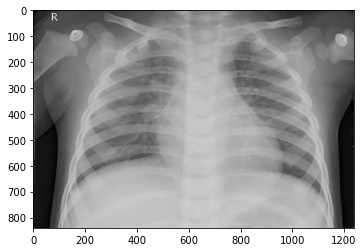

In [6]:
plt.imshow(chest_xray_PNEUMONIA)

In [7]:
chest_xray.shape

(1434, 1810, 3)

In [8]:
chest_xray_PNEUMONIA.shape

(840, 1240, 3)

In [9]:
img_width, img_height = 150,150

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
image_Gen= ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [12]:
input_shape=(150,150,3)

In [13]:
train_generator = image_Gen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [15]:
test_generator = image_Gen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Activation, Dropout, Flatten, Dense

In [29]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_5 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_6 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 32)       

In [31]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [58]:
from tensorflow.keras.preprocessing.image import  load_img,img_to_array

In [33]:
from tensorflow.keras import backend 

In [34]:
if backend.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [35]:

result = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=200,
    epochs=10,
    validation_data=test_generator,
    validation_steps=12)

Epoch 1/10
200/200 [==============================] - 175s 877ms/step - loss: 0.4566 - accuracy: 0.7984 - val_loss: 0.5666 - val_accuracy: 0.7083
Epoch 2/10
200/200 [==============================] - 224s 1s/step - loss: 0.3087 - accuracy: 0.8681 - val_loss: 0.4772 - val_accuracy: 0.7917
Epoch 3/10
200/200 [==============================] - 174s 869ms/step - loss: 0.2700 - accuracy: 0.8922 - val_loss: 0.4695 - val_accuracy: 0.8021
Epoch 4/10
200/200 [==============================] - 155s 777ms/step - loss: 0.2738 - accuracy: 0.8841 - val_loss: 0.5034 - val_accuracy: 0.8021
Epoch 5/10
200/200 [==============================] - 147s 735ms/step - loss: 0.2627 - accuracy: 0.8959 - val_loss: 0.7688 - val_accuracy: 0.7344
Epoch 6/10
200/200 [==============================] - 132s 658ms/step - loss: 0.2585 - accuracy: 0.8994 - val_loss: 0.7874 - val_accuracy: 0.8021
Epoch 7/10
200/200 [==============================] - 148s 740ms/step - loss: 0.2320 - accuracy: 0.9097 - val_loss: 0.5397 - va

In [36]:
val_data_dir = 'chest_xray/val'

In [37]:
val_generator = image_Gen.flow_from_directory(
    val_data_dir,
    target_size=(img_width, img_height),
    batch_size=16,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [38]:
scores = model.evaluate_generator(val_generator,steps=1)
print("\n%s: %.2f%%" % (model.metrics_names[0], scores[1]*100))
scores = model.evaluate_generator(train_generator,steps=1)
print("\n%s: %.2f%%" % (model.metrics_names, scores[1]*100))
scores = model.evaluate_generator(test_generator,steps=1)
print("\n%s: %.2f%%" % (model.metrics_names, scores[1]*100))


loss: 75.00%

['loss', 'accuracy']: 81.25%

['loss', 'accuracy']: 87.50%


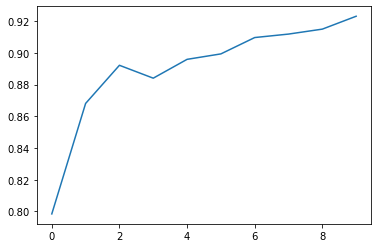

In [40]:
plt.plot(result.history['accuracy'])

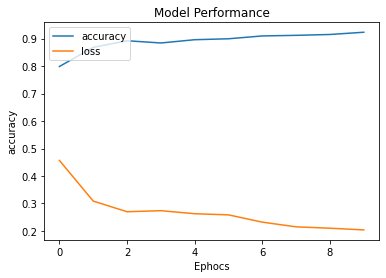

In [53]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['loss'])
plt.title('Model Performance')
plt.ylabel('accuracy')
plt.xlabel('Ephocs')
plt.legend(['accuracy','loss'],loc='upper left')
plt.show()

In [43]:
train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [60]:
import numpy as np

In [61]:
img_path = "chest_xray/test/NORMAL/IM-0001-0001.jpeg"
img = load_img(img_path, target_size=(150,150))

    # Preprocessing the image
img = img_to_array(img)
    # x = np.true_divide(x, 255)
img = np.expand_dims(img, axis=0)
img=img/255

preds = model.predict(img)

In [64]:
print(preds)

[[0.34998178]]


In [65]:
preds = model.predict_classes(img)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [66]:
preds

array([[0]])

In [67]:
img_path = "chest_xray/test/PNEUMONIA/person21_virus_52.jpeg"
img = load_img(img_path, target_size=(150,150))

    # Preprocessing the image
img = img_to_array(img)
    # x = np.true_divide(x, 255)
img = np.expand_dims(img, axis=0)
img=img/255

preds = model.predict(img)

In [68]:
preds=model.predict_classes(img)

In [69]:
preds

array([[1]])

In [70]:
model.save('Chest_Xray_Prediction.h5')